In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load datasets
train_data = pd.read_csv('C:\\Users\\THINKPAD\\Downloads\\Assignment_Train.csv')
test_data = pd.read_csv('C:\\Users\\THINKPAD\\Downloads\\Assignment_Test.csv')

train_original = train_data.copy()
test_original = test_data.copy()

In [3]:
train_data.head()
pd.options.display.max_columns = None
display(train_data)

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,True,V D AUTO WHEELS CHHOTIAL,95041.0,MCEXA,139542,85000,HONDA MOTORS,SHINE DRUM BSVI,SUNILSEHRAWAT7355@GMAIL.COM,Married,Male,1041978,44,Parental,SALARIED,sehrawat spare parts,SALARIED,SUNIL KUMAR,SUNIL CHANDER,ABFSPAY,SUNIL KUMAR,NaN,1.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,True,CHANDAN AUTOMOBILES 259 KGS TOWER,NaN,NaN,140208,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,NULL@GMAIL.COM,NaN,Male,1011997,25,NaN,NaN,NaN,NaN,AMRIT KUMAR,AMRIT KUMAR,OKSBI,Amrit Kumar,NaN,1.0,1.0,1.0,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,True,KN VISION 53HILL CART ROAD,119436.0,SCEXA,160001,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,CHETTRIDIKSHA@GMAIL.COM,Single,Male,9081999,22,Self/Spouse Owned,SELF-EMPLOYED,Thapas shop,SELF-EMPLOYED,ANIMESH THAPA,ANIMESH THAPA,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,True,MAHADEV AUTOMOBILES MANGLAUR,87000.0,MCECA,160832,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,ADITYA98@GAMIL.COM,Single,Male,3071998,24,Parental,SELF-EMPLOYED,agriculture farming,SELF-EMPLOYED,ADITYA KUMAR,ADITYA SINGH,PAYTM,Aditya Kumar,NaN,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,True,DWARKESH AUTO SHAMLAJI ROAD,NaN,NaN,174641,70000,HONDA MOTORS,DIO STD BSVI,PARMARHARESHBHAI1989@GMAIL.COM,NaN,Male,5071989,33,NaN,NaN,NaN,NaN,HARESHBHAI AMRUTBHAI PARMAR,PARMAR HARESHBHAI AMRUTBHAI,IKWIK,HARESHBHAI AMRUTBHAI,NaN,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,105101,07/11/22,FARRUKHABAD-SF,UTTAR PRADESH,AJAY,NaN,NARESH,8400644964,NO,NaN,True,GUPTA AUTO DEALERS BARHPUR,88970.0,MCECA,160832,87000,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,AJAYDEVSHAKYA@GMAIL.COM,Married,Male,12042000,22,Parental,SALARIED,GROWFAST ORGANIC DIAMAOND PVT LTD,SALARIED,AJAY DEV,AJAY NARESH,OKICICI,AJAY DEV,NaN,1.0,1.0,0.0,0.0,1.0,1.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,1.0,1.0,NaN,NaN,0.0,-1.0,60.576923,Medium,APPROVED
9996,85054,07/04/22,BHAGALPUR-SF,BIHAR,SURESH,KUMAR,PRASAD,9708883564,NO,NaN,True,RAMESHWARAM ENTERPRISES DR R P ROAD,120000.0,MCEXA,183085,90

In [5]:
test_data.head()
pd.options.display.max_columns = None
display(test_data)

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,105615,07/12/22,HUBLI-SF,NaN,VENUGOPAL,H,BHARADHVAJ,7019759674,NO,757,True,SHANTESHA AUTO PVT LTD PB ROAD,95352.0,SCECA,143241,88000,HONDA MOTORS,ACTIVA 6G STD BSVI,NULLMAIL@GMAIL.COM,Married,Male,10081965,56,Self/Spouse Owned,SALARIED,LIFE LINE HOSPITAL,SALARIED,VENUGOPAL SHESHAGIRI RAO BHARADHVAJ,VENUGOPAL H BHARADHVAJ,OKHDFCBANK,H VENUGOPAL BHARADHVAJ,NaN,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,676,100.000000,Medium
1,1840349097823778816,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,NaN,CHAUDHARY,7697884828,NO,750,True,YASH MOTORS PANNA ROAD,75371.0,MOECA,166536,75000,TVS MOTOR CO,XL 100 HD I TOUCH START WE BSVI,SHIV@GMAIL.COM,Married,Male,1011980,42,Parental,SELF-EMPLOYED,m/s shivdhar Kirana Store,SELF-EMPLOYED,SHIVDHAR CHAUDHARY,SHIVDHAR CHAUDHARY,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.000000,Low
2,1488102613362294272,74152,07/07/22,LUCKNOW-SF,UTTAR PRADESH,MANISH,NaN,VERMA,8840079825,NO,710,True,JP MOTOR PRIVATE LTD NEXT TO CARAK,94983.0,SCECA,134123,93000,HONDA MOTORS,ACTIVA 6G DLX,MANISHVERMA1996@GMAIL.COM,Single,Male,28091996,25,Self/Spouse Owned,SELF-EMPLOYED,RK TRADERS (OWNER),SELF-EMPLOYED,MANISH VERMA,MANISH VERMA,AXL,MANISH VERMA,NaN,1.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,NaN,1.0,NaN,1.0,NaN,0.0,1.0,0.0,1.0,NaN,0.0,839,100.000000,Medium
3,555529923942874624,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,RAVEENDRAN,8089276854,NO,695,True,GEORGE MAIJO INDUSTRIES P L ANANDAR,NaN,NaN,143627,95000,YAMAHA MOTOR,RAY ZR 125 FI DRUM BSVI,DEEPU@GMAIL.COM,NaN,Male,14041988,34,NaN,NaN,NaN,NaN,DEEPU RAVEENDRAN,DEEPU RAVEENDRAN RAVEENDRAN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.000000,Low
4,1010213070486150912,113037,07/08/22,PURI-SF,ORISSA,AKASHA,NaN,PRADHAN,9337511958,NO,NaN,True,MAA HENGULA MOTORS BRAHMAGIRI,90277.0,MCECA,143948,83000,HERO MOTORS,PASSION PRO SS DRUM BRAKE BSVI,AKASHAPRADHAN@GMAIL.COM,Single,Male,1011998,24,Parental,SELF-EMPLOYED,KHETRAPALA SEA FOODS,SELF-EMPLOYED,NaN,AKASHA PRADHAN,YBL,AKASH PRADHAN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.000000,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1595862360559879424,110697,07/25/2022,LUCKNOW-SF,NaN,PARVESH,KUMAR,NaN,8542832310,NO,734,True,SURESH AUTO SALES GONDA,89700.0,MCECA,138469,75000,TVS MOTOR CO,STARCITY PLUS DUAL TONE BSVI,PARVESHKUMARBRH123@GMAIL.COM,Single,Male,17011994,28,Parental,SELF-EMPLOYED,PAL KIRANA STORE,SELF-EMPLOYED,PRAVESH KUMAR PAL,PARVESH KUMAR,YBL,Mr PRAVESH KUMAR PAL,NaN,1.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,1.0,1.0,NaN,NaN,0.0,1998,81.363636,Medium
1996,879889749720017664

In [13]:
train_data.shape[0]/(train_data.shape[0]+test_data.shape[0]), test_data.shape[0]/(train_data.shape[0]+test_data.shape[0])

(0.8333333333333334, 0.16666666666666666)

In [19]:
## Data Cleaning and Processing

In [43]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
# Impute missing values for 'HDB BRANCH NAME' and 'HDB BRANCH STATE' in train_data
train_data['HDB BRANCH NAME'] = cat_imputer.fit_transform(train_data[['HDB BRANCH NAME']]).ravel()
train_data['HDB BRANCH STATE'] = cat_imputer.fit_transform(train_data[['HDB BRANCH STATE']]).ravel()
# Verify the changes
print("Train Data Missing Values:")
print(train_data[['HDB BRANCH NAME', 'HDB BRANCH STATE']].isnull().sum())


Train Data Missing Values:
HDB BRANCH NAME     0
HDB BRANCH STATE    0
dtype: int64


In [45]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
# Impute missing values for 'HDB BRANCH NAME' and 'HDB BRANCH STATE' in train_data
test_data['HDB BRANCH STATE'] = cat_imputer.fit_transform(test_data[['HDB BRANCH STATE']]).ravel()
# Verify the changes
print("T Data Missing Values:")
print(test_data[['HDB BRANCH STATE']].isnull().sum())



T Data Missing Values:
HDB BRANCH STATE    0
dtype: int64


In [35]:
print(train_data[['HDB BRANCH NAME', 'HDB BRANCH STATE']].head(50))

     HDB BRANCH NAME HDB BRANCH STATE
0           DELHI-SF            DELHI
1           PATNA-SF            BIHAR
2      DARJEELING-SF      WEST BENGAL
3      SAHARANPUR-SF    UTTAR PRADESH
4          MODASA-SF          GUJARAT
5          RAMPUR-SF    UTTAR PRADESH
6      DELHI EAST-SF            DELHI
7        MIRZAPUR-SF    UTTAR PRADESH
8            JIND-SF          HARYANA
9          NAWADA-SF            BIHAR
10       VARANASI-SF    UTTAR PRADESH
11        BHIWANI-SF          HARYANA
12        BELLARY-SF        KARNATAKA
13         MEERUT-SF    UTTAR PRADESH
14        INDAPUR-SF      MAHARASHTRA
15        LUCKNOW-SF    UTTAR PRADESH
16          TIRUR-SF           KERALA
17        GURGAON-SF          HARYANA
18     HOSHNGABAD-SF   MADHYA PRADESH
19        SASARAM-SF    UTTAR PRADESH
20         BHOPAL-SF   MADHYA PRADESH
21       VARANASI-SF    UTTAR PRADESH
22  GREATER NOIDA-SF    UTTAR PRADESH
23       CHHAPARA-SF            BIHAR
24       DEHRADUN-SF      UTTARAKHAND
25      DARB

In [63]:
import numpy as np


# Function to extract the last name
def extract_last_name(name):
    if isinstance(name, str) and len(name.split()) > 1:
        return name.split()[-1]
    return np.nan

# Function to extract Pan Name (assuming Pan Name is similar to the first name for simplicity)
def extract_pan_name(name):
    return name.split()[0] if isinstance(name, str) else np.nan

# Safely filling missing LAST NAME based on 'name' column
train_data['LAST NAME'] = train_data['LAST NAME'].fillna(train_data['name'].apply(extract_last_name))
test_data['LAST NAME'] = test_data['LAST NAME'].fillna(test_data['name'].apply(extract_last_name))

# Safely filling missing MIDDLE NAME based on 'name' column
train_data['LAST NAME'] = train_data['LAST NAME'].fillna(train_data['name'].apply(extract_last_name))
test_data['LAST NAME'] = test_data['LAST NAME'].fillna(test_data['name'].apply(extract_last_name))

# Safely filling missing Pan Name based on 'name' column
train_data['Pan Name'] = train_data['Pan Name'].fillna(train_data['name'].apply(extract_pan_name))
test_data['Pan Name'] = test_data['Pan Name'].fillna(test_data['name'].apply(extract_pan_name))

# Verify the changes
print(train_data[['name', 'LAST NAME','Pan Name']].head())
print(test_data[['name', 'LAST NAME','Pan Name']].head())



                          name  LAST NAME                     Pan Name
0                SUNIL CHANDER    CHANDER                  SUNIL KUMAR
1                  AMRIT KUMAR      KUMAR                  AMRIT KUMAR
2                ANIMESH THAPA      THAPA                ANIMESH THAPA
3                 ADITYA SINGH      SINGH                 ADITYA KUMAR
4  PARMAR HARESHBHAI AMRUTBHAI  AMRUTBHAI  HARESHBHAI AMRUTBHAI PARMAR
                          name   LAST NAME  \
0       VENUGOPAL H BHARADHVAJ  BHARADHVAJ   
1           SHIVDHAR CHAUDHARY   CHAUDHARY   
2                 MANISH VERMA       VERMA   
3  DEEPU RAVEENDRAN RAVEENDRAN  RAVEENDRAN   
4               AKASHA PRADHAN     PRADHAN   

                              Pan Name  
0  VENUGOPAL SHESHAGIRI RAO BHARADHVAJ  
1                   SHIVDHAR CHAUDHARY  
2                         MANISH VERMA  
3                     DEEPU RAVEENDRAN  
4                               AKASHA  


In [53]:
# Dropping 'MIDDLE NAME' column from both train and test datasets
train_data = train_data.drop(columns=['MIDDLE NAME'])
test_data = test_data.drop(columns=['MIDDLE NAME'])

                          name  LAST NAME                     Pan Name
0                SUNIL CHANDER    CHANDER                  SUNIL KUMAR
1                  AMRIT KUMAR      KUMAR                  AMRIT KUMAR
2                ANIMESH THAPA      THAPA                ANIMESH THAPA
3                 ADITYA SINGH      SINGH                 ADITYA KUMAR
4  PARMAR HARESHBHAI AMRUTBHAI  AMRUTBHAI  HARESHBHAI AMRUTBHAI PARMAR
                          name   LAST NAME  \
0       VENUGOPAL H BHARADHVAJ  BHARADHVAJ   
1           SHIVDHAR CHAUDHARY   CHAUDHARY   
2                 MANISH VERMA       VERMA   
3  DEEPU RAVEENDRAN RAVEENDRAN  RAVEENDRAN   
4               AKASHA PRADHAN     PRADHAN   

                              Pan Name  
0  VENUGOPAL SHESHAGIRI RAO BHARADHVAJ  
1                   SHIVDHAR CHAUDHARY  
2                         MANISH VERMA  
3                     DEEPU RAVEENDRAN  
4                               AKASHA  


In [93]:
import pandas as pd
import numpy as np
from nameparser import HumanName

def extract_last_name(name):
    if pd.isna(name):
        return np.nan
    parsed_name = HumanName(name)
    return parsed_name.last or parsed_name.first

def clean_and_fill_last_name(data):
    # First, try to fill Last Name with Pan Name where it's null
    data['LAST NAME'] = data['LAST NAME'].fillna(data['Pan Name'])
    
    # For remaining nulls, try to extract from 'name' column
    mask = data['LAST NAME'].isnull()
    data.loc[mask, 'LAST NAME'] = data.loc[mask, 'name'].apply(extract_last_name)
    
    # If still null, use Pan Name as a last resort
    data['LAST NAME'] = data['LAST NAME'].fillna(data['Pan Name'])
    
    # Flag rows where we had to use Pan Name as Last Name
    data['last_name_from_pan'] = data['LAST NAME'] == data['Pan Name']
    
    return data

# Apply the cleaning to train data
train_data = clean_and_fill_last_name(train_data)

# Apply the cleaning to test data
test_data = clean_and_fill_last_name(test_data)

# Verify the changes for train data
print("Train Data:")
print(train_data[['name', 'LAST NAME', 'Pan Name', 'last_name_from_pan']].head(10))

# Verify the changes for test data
print("\nTest Data:")
print(test_data[['name', 'LAST NAME', 'Pan Name', 'last_name_from_pan']].head(10))

# Check remaining null values in train data
print("\nNull values in train data:")
print(train_data[['LAST NAME', 'Pan Name']].isnull().sum())

# Check remaining null values in test data
print("\nNull values in test data:")
print(test_data[['LAST NAME', 'Pan Name']].isnull().sum())

# Check how many times we had to use Pan Name as Last Name in train data
print("\nTimes Pan Name was used as Last Name in train data:")
print(train_data['last_name_from_pan'].sum())

# Check how many times we had to use Pan Name as Last Name in test data
print("\nTimes Pan Name was used as Last Name in test data:")
print(test_data['last_name_from_pan'].sum())

Train Data:
                          name  LAST NAME                     Pan Name  \
0                SUNIL CHANDER    CHANDER                  SUNIL KUMAR   
1                  AMRIT KUMAR      KUMAR                  AMRIT KUMAR   
2                ANIMESH THAPA      THAPA                ANIMESH THAPA   
3                 ADITYA SINGH      SINGH                 ADITYA KUMAR   
4  PARMAR HARESHBHAI AMRUTBHAI  AMRUTBHAI  HARESHBHAI AMRUTBHAI PARMAR   
5          AAYSHA ABDUL LATEEF     LATEEF                       AAYSHA   
6                 ROYEL HAZARI     HAZARI                 ROYEL HAZARI   
7                MOHMMAD ASHIF      ASHIF                MOHMMAD ASHIF   
8              DEEPAK RAMMEHAR   RAMMEHAR                       DEEPAK   
9              SURAJ RAJVANSHI  RAJVANSHI                  SURAJ KUMAR   

   last_name_from_pan  
0               False  
1               False  
2               False  
3               False  
4               False  
5               False  
6    

In [107]:
train_data['MARITAL STATUS'] = train_data['MARITAL STATUS'].fillna(train_data['MARITAL STATUS'].mode()[0])
train_data['ADDRESS TYPE'] = train_data['ADDRESS TYPE'].fillna(train_data['ADDRESS TYPE'].mode()[0])
test_data['MARITAL STATUS'] = test_data['MARITAL STATUS'].fillna(test_data['MARITAL STATUS'].mode()[0])
test_data['ADDRESS TYPE'] = test_data['ADDRESS TYPE'].fillna(test_data['ADDRESS TYPE'].mode()[0])



In [119]:
train_data['Cibil Score'] = train_data['Cibil Score'].fillna(train_data['Cibil Score'].mode()[0])


In [123]:
print(train_data[['Cibil Score']].isnull().sum())

Cibil Score    0
dtype: int64


In [125]:
test_data['Cibil Score'] = test_data['Cibil Score'].fillna(test_data['Cibil Score'].mode()[0])
print(test_data[['Cibil Score']].isnull().sum())

Cibil Score    0
dtype: int64


In [127]:
print(train_data[['Cibil Score']].head())
print(test_data[['Cibil Score']].head())

  Cibil Score
0         726
1         752
2         737
3         713
4         669
  Cibil Score
0         757
1         750
2         710
3         695
4         546


In [133]:
train_data['DEALER NAME'] = train_data['DEALER NAME'].fillna(train_data['DEALER NAME'].mode()[0])
print(train_data[['DEALER NAME']].isnull().sum())

DEALER NAME    0
dtype: int64


In [137]:
train_data['EMPLOYER NAME'] = train_data['EMPLOYER NAME'].fillna('UNKNOWN')
test_data['EMPLOYER NAME'] = test_data['EMPLOYER NAME'].fillna('UNKNOWN')

train_data['EMPLOYER TYPE'] = train_data['EMPLOYER TYPE'].fillna('UNKNOWN')
test_data['EMPLOYER TYPE'] = test_data['EMPLOYER TYPE'].fillna('UNKNOWN')

train_data['EMPLOY CONSTITUTION'] = train_data['EMPLOY CONSTITUTION'].fillna('UNKNOWN')
test_data['EMPLOY CONSTITUTION'] = test_data['EMPLOY CONSTITUTION'].fillna('UNKNOWN')

print(train_data['EMPLOYER TYPE'].head(50))
print(test_data['EMPLOYER TYPE'].head(50))

print(train_data['EMPLOYER NAME'].head(50))
print(test_data['EMPLOYER NAME'].head(50))

0          SALARIED
1           UNKNOWN
2     SELF-EMPLOYED
3     SELF-EMPLOYED
4           UNKNOWN
5           UNKNOWN
6          SALARIED
7           UNKNOWN
8     SELF-EMPLOYED
9     SELF-EMPLOYED
10    SELF-EMPLOYED
11          UNKNOWN
12          UNKNOWN
13          UNKNOWN
14          UNKNOWN
15          UNKNOWN
16    SELF-EMPLOYED
17         SALARIED
18    SELF-EMPLOYED
19    SELF-EMPLOYED
20          UNKNOWN
21          UNKNOWN
22         SALARIED
23    SELF-EMPLOYED
24          UNKNOWN
25    SELF-EMPLOYED
26    SELF-EMPLOYED
27          UNKNOWN
28    SELF-EMPLOYED
29          UNKNOWN
30    SELF-EMPLOYED
31          UNKNOWN
32    SELF-EMPLOYED
33    SELF-EMPLOYED
34    SELF-EMPLOYED
35         SALARIED
36          UNKNOWN
37          UNKNOWN
38         SALARIED
39          UNKNOWN
40          UNKNOWN
41          UNKNOWN
42          UNKNOWN
43          UNKNOWN
44         SALARIED
45    SELF-EMPLOYED
46          UNKNOWN
47    SELF-EMPLOYED
48          UNKNOWN
49          UNKNOWN


In [143]:
from sklearn.impute import KNNImputer

# Define the columns
numerical_cols = ['TOTAL ASSET COST']
categorical_cols = ['ASSET CTG']

# Fit the imputer on the training data
imputer = KNNImputer(n_neighbors=5)
train_data[numerical_cols] = imputer.fit_transform(train_data[numerical_cols])

# Apply the same imputer to the test data
test_data[numerical_cols] = imputer.transform(test_data[numerical_cols])

# Impute categorical columns in both train and test by filling with the mode
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])
test_data[categorical_cols] = test_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])  # Use mode from train

# Check the resulting data
print(train_data.head())
print(test_data.head())


   DEALER ID APPLICATION LOGIN DATE HDB BRANCH NAME HDB BRANCH STATE  \
0     106989             07/20/2022        DELHI-SF            DELHI   
1     108975             07/28/2022        PATNA-SF            BIHAR   
2     111004             07/15/2022   DARJEELING-SF      WEST BENGAL   
3     192020               07/04/22   SAHARANPUR-SF    UTTAR PRADESH   
4      55095             07/15/2022       MODASA-SF          GUJARAT   

  FIRST NAME  LAST NAME      mobile AADHAR VERIFIED Cibil Score  \
0      SUNIL    CHANDER  9210574080              NO         726   
1      AMRIT      KUMAR  8877987018              NO         752   
2    ANIMESH      THAPA  8910862135              NO         737   
3     ADITYA      SINGH  9758428017              NO         713   
4     PARMAR  AMRUTBHAI  9687028486              NO         669   

   MOBILE VERIFICATION                        DEALER NAME  TOTAL ASSET COST  \
0                 True           V D AUTO WHEELS CHHOTIAL      95041.000000   
1     

In [145]:
# Print columns before dropping
print("Columns before dropping:", train_data.columns)

# Define the specific columns to drop
columns_to_drop_train = [
    'Phone Social Premium.a23games',
    'Phone Social Premium.my11',
    'Phone Social Premium.whatsapp',
    'Phone Social Premium.yatra',
    'Phone Social Premium.zoho',
    'Phone Social Premium.shaadi',
    'Phone Social Premium.jeevansaathi',
    'Phone Social Premium.instagram'
]

# Drop columns one by one
for column in columns_to_drop_train:
    if column in train_data.columns:
        train_data = train_data.drop(columns=column)
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Print columns after dropping
print("Columns after dropping:", train_data.columns)


Columns before dropping: Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11

In [147]:
train_data.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.isWABusiness,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.skype,Phone Social Premium.toi,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,last_name_from_pan
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,CHANDER,9210574080,NO,726,True,V D AUTO WHEELS CHHOTIAL,95041.000000,MCEXA,139542,85000,HONDA MOTORS,SHINE DRUM BSVI,SUNILSEHRAWAT7355@GMAIL.COM,Married,Male,1041978,44,Parental,SALARIED,sehrawat spare parts,SALARIED,SUNIL KUMAR,SUNIL CHANDER,ABFSPAY,SUNIL KUMAR,1.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,1.0,NaN,0.0,1.0,5324.0,67.222222,High,APPROVED,False
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,KUMAR,8877987018,NO,752,True,CHANDAN AUTOMOBILES 259 KGS TOWER,97612.518397,MCECA,140208,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,NULL@GMAIL.COM,Married,Male,1011997,25,Self/Spouse Owned,UNKNOWN,UNKNOWN,UNKNOWN,AMRIT KUMAR,AMRIT KUMAR,OKSBI,Amrit Kumar,1.0,1.0,1.0,0.0,1.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,1998.0,100.000000,High,APPROVED,False
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,THAPA,8910862135,NO,737,True,KN VISION 53HILL CART ROAD,119436.000000,SCEXA,160001,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,CHETTRIDIKSHA@GMAIL.COM,Single,Male,9081999,22,Self/Spouse Owned,SELF-EMPLOYED,Thapas shop,SELF-EMPLOYED,ANIMESH THAPA,ANIMESH THAPA,NaN,NaN,0.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,-1.0,-1.000000,Low,APPROVED,False
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,SINGH,9758428017,NO,713,True,MAHADEV AUTOMOBILES MANGLAUR,87000.000000,MCECA,160832,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,ADITYA98@GAMIL.COM,Single,Male,3071998,24,Parental,SELF-EMPLOYED,agriculture farming,SELF-EMPLOYED,ADITYA KUMAR,ADITYA SINGH,PAYTM,Aditya Kumar,0.0,0.0,1.0,1.0,1.0,NaN,NaN,0.0,1.0,NaN,0.0,1.0,1998.0,72.777778,High,APPROVED,False
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,AMRUTBHAI,9687028486,NO,669,True,DWARKESH AUTO SHAMLAJI ROAD,97612.518397,MCECA,174641,70000,HONDA MOTORS,DIO STD BSVI,PARMARHARESHBHAI1989@GMAIL.COM,Married,Male,5071989,33,Self/Spouse Owned,UNKNOWN,UNKNOWN,UNKNOWN,HARESHBHAI AMRUTBHAI PARMAR,PARMAR HARESHBHAI AMRUTBHAI,IKWIK,HARESHBHAI AMRUTBHAI,1.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,1.0,NaN,0.0,1.0,1998.0,68.095238,High,DECLINED,False


In [149]:
# Print columns before dropping
print("Columns before dropping:", test_data.columns)

# Define the specific columns to drop
columns_to_drop_train = [
    'Phone Social Premium.a23games',
    'Phone Social Premium.my11',
    'Phone Social Premium.whatsapp',
    'Phone Social Premium.yatra',
    'Phone Social Premium.zoho',
    'Phone Social Premium.shaadi',
    'Phone Social Premium.jeevansaathi',
    'Phone Social Premium.instagram',
    
]

# Drop columns one by one
for column in columns_to_drop_train:
    if column in test_data.columns:
        test_data = test_data.drop(columns=column)
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Print columns after dropping
print("Columns after dropping:", test_data.columns)


Columns before dropping: Index(['UID', 'DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premi

In [151]:
test_data.head()

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.isWABusiness,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.skype,Phone Social Premium.toi,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,last_name_from_pan
0,1844045271814558464,105615,07/12/22,HUBLI-SF,UTTAR PRADESH,VENUGOPAL,BHARADHVAJ,7019759674,NO,757,True,SHANTESHA AUTO PVT LTD PB ROAD,95352.000000,SCECA,143241,88000,HONDA MOTORS,ACTIVA 6G STD BSVI,NULLMAIL@GMAIL.COM,Married,Male,10081965,56,Self/Spouse Owned,SALARIED,LIFE LINE HOSPITAL,SALARIED,VENUGOPAL SHESHAGIRI RAO BHARADHVAJ,VENUGOPAL H BHARADHVAJ,OKHDFCBANK,H VENUGOPAL BHARADHVAJ,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,NaN,0.0,0.0,676,100.0,Medium,False
1,1840349097823778816,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,CHAUDHARY,7697884828,NO,750,True,YASH MOTORS PANNA ROAD,75371.000000,MOECA,166536,75000,TVS MOTOR CO,XL 100 HD I TOUCH START WE BSVI,SHIV@GMAIL.COM,Married,Male,1011980,42,Parental,SELF-EMPLOYED,m/s shivdhar Kirana Store,SELF-EMPLOYED,SHIVDHAR CHAUDHARY,SHIVDHAR CHAUDHARY,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,897,-1.0,Low,False
2,1488102613362294272,74152,07/07/22,LUCKNOW-SF,UTTAR PRADESH,MANISH,VERMA,8840079825,NO,710,True,JP MOTOR PRIVATE LTD NEXT TO CARAK,94983.000000,SCECA,134123,93000,HONDA MOTORS,ACTIVA 6G DLX,MANISHVERMA1996@GMAIL.COM,Single,Male,28091996,25,Self/Spouse Owned,SELF-EMPLOYED,RK TRADERS (OWNER),SELF-EMPLOYED,MANISH VERMA,MANISH VERMA,AXL,MANISH VERMA,1.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,839,100.0,Medium,False
3,555529923942874624,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,8089276854,NO,695,True,GEORGE MAIJO INDUSTRIES P L ANANDAR,97612.518397,MCECA,143627,95000,YAMAHA MOTOR,RAY ZR 125 FI DRUM BSVI,DEEPU@GMAIL.COM,Married,Male,14041988,34,Self/Spouse Owned,UNKNOWN,UNKNOWN,UNKNOWN,DEEPU RAVEENDRAN,DEEPU RAVEENDRAN RAVEENDRAN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,2050,-1.0,Low,False
4,1010213070486150912,113037,07/08/22,PURI-SF,ORISSA,AKASHA,PRADHAN,9337511958,NO,546,True,MAA HENGULA MOTORS BRAHMAGIRI,90277.000000,MCECA,143948,83000,HERO MOTORS,PASSION PRO SS DRUM BRAKE BSVI,AKASHAPRADHAN@GMAIL.COM,Single,Male,1011998,24,Parental,SELF-EMPLOYED,KHETRAPALA SEA FOODS,SELF-EMPLOYED,AKASHA,AKASHA PRADHAN,YBL,AKASH PRADHAN,1.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,-1,-1.0,Very Low,False


In [157]:
train_data.isnull().sum()

DEALER ID                                 0
APPLICATION LOGIN DATE                    0
HDB BRANCH NAME                           0
HDB BRANCH STATE                          0
FIRST NAME                                0
LAST NAME                                 0
mobile                                    0
AADHAR VERIFIED                           0
Cibil Score                               0
MOBILE VERIFICATION                       0
DEALER NAME                               0
TOTAL ASSET COST                          0
ASSET CTG                                 0
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
Personal Email Address                    0
MARITAL STATUS                            0
GENDER                                    0
DOB                                       0
AGE                                       0
ADDRESS TYPE                    

In [155]:
train_data['vpa'] = train_data['vpa'].fillna('UNKNOWN')
test_data['vpa'] = test_data['vpa'].fillna('UNKNOWN')
train_data['upi_name'] = train_data['upi_name'].fillna('UNKNOWN')
test_data['upi_name'] = test_data['upi_name'].fillna('UNKNOWN')




print(train_data['vpa'].head(50))
print(test_data['vpa'].head(50))
print(train_data['upi_name'].head(50))
print(test_data['upi_name'].head(50))

0        ABFSPAY
1          OKSBI
2        UNKNOWN
3          PAYTM
4          IKWIK
5            AXL
6            IBL
7            IBL
8          PAYTM
9        OKICICI
10         OKSBI
11        OKAXIS
12       OKICICI
13           YBL
14        OKAXIS
15           IBL
16         OKSBI
17           YBL
18           YBL
19       UNKNOWN
20       UNKNOWN
21         PAYTM
22           YBL
23        OKAXIS
24       UNKNOWN
25       UNKNOWN
26           YBL
27    OKHDFCBANK
28         PAYTM
29         OKSBI
30        PTAXIS
31       UNKNOWN
32       UNKNOWN
33       UNKNOWN
34         OKSBI
35       OKICICI
36         PAYTM
37       UNKNOWN
38       UNKNOWN
39        OKAXIS
40           AXL
41           AXL
42    OKHDFCBANK
43           YBL
44           YBL
45         OKSBI
46         OKSBI
47       UNKNOWN
48       OKICICI
49       UNKNOWN
Name: vpa, dtype: object
0     OKHDFCBANK
1        UNKNOWN
2            AXL
3        UNKNOWN
4            YBL
5          PAYTM
6     OKHDFCBANK
7     

In [159]:
# Print columns before dropping
print("Columns before dropping:", train_data.columns)

# Define the specific columns to drop
columns_to_drop_train = [
      'Phone Social Premium.rummycircle',
      'Phone Social Premium.isWABusiness',
      'Phone Social Premium.skype',
     'Phone Social Premium.jiomart'
    
    ]

# Drop columns one by one
for column in columns_to_drop_train:
    if column in train_data.columns:
        train_data = train_data.drop(columns=column)
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Print columns after dropping
print("Columns after dropping:", train_data.columns)

Columns before dropping: Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.amazon',
       'Phone Social Premium.byjus', 'Phone Social Premium.flipkart',
       'Phone Social Premium.housing', 'Phone Social Premium.indiamart',
       'Phone Social Premium.isWABusiness', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.paytm',
       'Phone Social Premium.rummycircle', 'Phone Social Premium.skype',
       'Phone Social Premium.toi', 'phone

In [171]:
train_data['Phone Social Premium.amazon'].value_counts()
train_data['Phone Social Premium.amazon'].fillna(train_data['Phone Social Premium.amazon'].median(), inplace=True)

Phone Social Premium.amazon
0.0    4151
1.0    3933
Name: count, dtype: int64

In [173]:
train_data['Phone Social Premium.byjus'].value_counts()

Phone Social Premium.byjus
0.0    6847
1.0    1205
Name: count, dtype: int64

In [175]:
train_data['Phone Social Premium.flipkart'].value_counts()

Phone Social Premium.flipkart
1.0    6113
0.0    2055
Name: count, dtype: int64

In [177]:
train_data['Phone Social Premium.indiamart'].value_counts()

Phone Social Premium.indiamart
1.0    8118
0.0     107
Name: count, dtype: int64

In [179]:
train_data['Phone Social Premium.microsoft'].value_counts()

Phone Social Premium.microsoft
0.0    6910
1.0    1218
Name: count, dtype: int64

In [181]:
train_data['Phone Social Premium.paytm'].value_counts()

Phone Social Premium.paytm
1.0    6760
0.0    1483
Name: count, dtype: int64

In [183]:
train_data['Phone Social Premium.toi'].value_counts()

Phone Social Premium.toi
0.0    6036
1.0    2021
Name: count, dtype: int64

In [187]:
train_data['Phone Social Premium.amazon'].fillna(train_data['Phone Social Premium.amazon'].median())

0       1.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
9995    1.0
9996    1.0
9997    0.0
9998    0.0
9999    1.0
Name: Phone Social Premium.amazon, Length: 10000, dtype: float64

In [207]:
# Fill missing values with the median and assign it back to the column
train_data['Phone Social Premium.byjus'] = train_data['Phone Social Premium.byjus'].fillna(train_data['Phone Social Premium.byjus'].median())



In [236]:
train_data.isnull().sum()

DEALER ID                              0
APPLICATION LOGIN DATE                 0
HDB BRANCH NAME                        0
HDB BRANCH STATE                       0
FIRST NAME                             0
LAST NAME                              0
mobile                                 0
AADHAR VERIFIED                        0
Cibil Score                            0
MOBILE VERIFICATION                    0
DEALER NAME                            0
TOTAL ASSET COST                       0
ASSET CTG                              0
ASSET MODEL NO                         0
APPLIED AMOUNT                         0
PRIMARY ASSET MAKE                     0
Primary Asset Model No                 0
Personal Email Address                 0
MARITAL STATUS                         0
GENDER                                 0
DOB                                    0
AGE                                    0
ADDRESS TYPE                           0
EMPLOY CONSTITUTION                    0
EMPLOYER NAME   

In [213]:
train_data['Phone Social Premium.flipkart'] = train_data['Phone Social Premium.flipkart'].fillna(train_data['Phone Social Premium.flipkart'].median())

In [217]:
train_data['Phone Social Premium.housing'] = train_data['Phone Social Premium.housing'].fillna(train_data['Phone Social Premium.housing'].median())

In [221]:
train_data['Phone Social Premium.indiamart'] = train_data['Phone Social Premium.indiamart'].fillna(train_data['Phone Social Premium.indiamart'].median())

In [225]:
train_data['Phone Social Premium.microsoft'] = train_data['Phone Social Premium.microsoft'].fillna(train_data['Phone Social Premium.microsoft'].median())

In [230]:
train_data['Phone Social Premium.paytm'] = train_data['Phone Social Premium.paytm'].fillna(train_data['Phone Social Premium.paytm'].median())

In [234]:
train_data['Phone Social Premium.toi'] = train_data['Phone Social Premium.toi'].fillna(train_data['Phone Social Premium.toi'].median())

In [238]:
# Fill missing values in test_data with the median of each respective column

test_data['Phone Social Premium.amazon'] = test_data['Phone Social Premium.amazon'].fillna(test_data['Phone Social Premium.amazon'].median())
test_data['Phone Social Premium.byjus'] = test_data['Phone Social Premium.byjus'].fillna(test_data['Phone Social Premium.byjus'].median())
test_data['Phone Social Premium.flipkart'] = test_data['Phone Social Premium.flipkart'].fillna(test_data['Phone Social Premium.flipkart'].median())
test_data['Phone Social Premium.housing'] = test_data['Phone Social Premium.housing'].fillna(test_data['Phone Social Premium.housing'].median())
test_data['Phone Social Premium.indiamart'] = test_data['Phone Social Premium.indiamart'].fillna(test_data['Phone Social Premium.indiamart'].median())
test_data['Phone Social Premium.microsoft'] = test_data['Phone Social Premium.microsoft'].fillna(test_data['Phone Social Premium.microsoft'].median())
test_data['Phone Social Premium.paytm'] = test_data['Phone Social Premium.paytm'].fillna(test_data['Phone Social Premium.paytm'].median())
test_data['Phone Social Premium.toi'] = test_data['Phone Social Premium.toi'].fillna(test_data['Phone Social Premium.toi'].median())

# Optional: check value counts or other operations on columns after filling missing values
print(test_data['Phone Social Premium.amazon'].value_counts())
print(test_data['Phone Social Premium.byjus'].value_counts())
print(test_data['Phone Social Premium.flipkart'].value_counts())
print(test_data['Phone Social Premium.indiamart'].value_counts())
print(test_data['Phone Social Premium.microsoft'].value_counts())
print(test_data['Phone Social Premium.paytm'].value_counts())
print(test_data['Phone Social Premium.toi'].value_counts())


Phone Social Premium.amazon
0.0    1118
1.0     882
Name: count, dtype: int64
Phone Social Premium.byjus
0.0    1728
1.0     272
Name: count, dtype: int64
Phone Social Premium.flipkart
1.0    1499
0.0     501
Name: count, dtype: int64
Phone Social Premium.indiamart
1.0    1999
0.0       1
Name: count, dtype: int64
Phone Social Premium.microsoft
0.0    1703
1.0     297
Name: count, dtype: int64
Phone Social Premium.paytm
1.0    1649
0.0     351
Name: count, dtype: int64
Phone Social Premium.toi
0.0    1523
1.0     477
Name: count, dtype: int64


In [246]:
test_data['Phone Social Premium.isWABusiness'] = test_data['Phone Social Premium.isWABusiness'].fillna(test_data['Phone Social Premium.isWABusiness'].median())

In [260]:
test_data['Phone Social Premium.jiomart'] = test_data['Phone Social Premium.jiomart'].fillna(test_data['Phone Social Premium.jiomart'].median())

In [264]:
print("Columns before dropping:", test_data.columns)

# Define the specific columns to drop
columns_to_drop_test = [
      'Phone Social Premium.rummycircle',
      'Phone Social Premium.isWABusiness',
      'Phone Social Premium.skype',
      'Phone Social Premium.jiomart'
    
    ]

# Drop columns one by one
for column in columns_to_drop_test:
    if column in test_data.columns:
        test_data = test_data.drop(columns=column)
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Print columns after dropping
print("Columns after dropping:", test_data.columns)

Columns before dropping: Index(['UID', 'DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.amazon',
       'Phone Social Premium.byjus', 'Phone Social Premium.flipkart',
       'Phone Social Premium.housing', 'Phone Social Premium.indiamart',
       'Phone Social Premium.isWABusiness', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.paytm',
       'Phone Social Premium.rummycircle', 'Phone Social Premium.skype',
       'Phone Social Premium.toi',

In [272]:
train_data['phone_digitalage'].fillna(train_data['phone_digitalage'].mean())


0       5324.0
1       1998.0
2         -1.0
3       1998.0
4       1998.0
         ...  
9995      -1.0
9996    1998.0
9997    1988.0
9998    1096.0
9999     809.0
Name: phone_digitalage, Length: 10000, dtype: float64

In [276]:
# Replace -1 with NaN first
train_data['phone_nameMatchScore'] = train_data['phone_nameMatchScore'].replace(-1, np.nan)

# Fill NaN with the mean of the column
train_data['phone_nameMatchScore'] = train_data['phone_nameMatchScore'].fillna(train_data['phone_nameMatchScore'].mean())



In [282]:
# Fill missing values in 'phone_phoneFootprintStrengthOverall' with the mode (most frequent value)
train_data['phone_phoneFootprintStrengthOverall'] = train_data['phone_phoneFootprintStrengthOverall'].fillna(train_data['phone_phoneFootprintStrengthOverall'].mode()[0])
# Fill missing values in 'phone_phoneFootprintStrengthOverall' with the mode (most frequent value)
test_data['phone_phoneFootprintStrengthOverall'] = test_data['phone_phoneFootprintStrengthOverall'].fillna(test_data['phone_phoneFootprintStrengthOverall'].mode()[0])


In [288]:
train_data.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.toi,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,last_name_from_pan
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,CHANDER,9210574080,NO,726,True,V D AUTO WHEELS CHHOTIAL,95041.000000,MCEXA,139542,85000,HONDA MOTORS,SHINE DRUM BSVI,SUNILSEHRAWAT7355@GMAIL.COM,Married,Male,1041978,44,Parental,SALARIED,sehrawat spare parts,SALARIED,SUNIL KUMAR,SUNIL CHANDER,ABFSPAY,SUNIL KUMAR,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5324.0,67.222222,High,APPROVED,False
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,KUMAR,8877987018,NO,752,True,CHANDAN AUTOMOBILES 259 KGS TOWER,97612.518397,MCECA,140208,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,NULL@GMAIL.COM,Married,Male,1011997,25,Self/Spouse Owned,UNKNOWN,UNKNOWN,UNKNOWN,AMRIT KUMAR,AMRIT KUMAR,OKSBI,Amrit Kumar,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1998.0,100.000000,High,APPROVED,False
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,THAPA,8910862135,NO,737,True,KN VISION 53HILL CART ROAD,119436.000000,SCEXA,160001,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,CHETTRIDIKSHA@GMAIL.COM,Single,Male,9081999,22,Self/Spouse Owned,SELF-EMPLOYED,Thapas shop,SELF-EMPLOYED,ANIMESH THAPA,ANIMESH THAPA,UNKNOWN,UNKNOWN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,78.941974,Low,APPROVED,False
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,SINGH,9758428017,NO,713,True,MAHADEV AUTOMOBILES MANGLAUR,87000.000000,MCECA,160832,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,ADITYA98@GAMIL.COM,Single,Male,3071998,24,Parental,SELF-EMPLOYED,agriculture farming,SELF-EMPLOYED,ADITYA KUMAR,ADITYA SINGH,PAYTM,Aditya Kumar,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1998.0,72.777778,High,APPROVED,False
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,AMRUTBHAI,9687028486,NO,669,True,DWARKESH AUTO SHAMLAJI ROAD,97612.518397,MCECA,174641,70000,HONDA MOTORS,DIO STD BSVI,PARMARHARESHBHAI1989@GMAIL.COM,Married,Male,5071989,33,Self/Spouse Owned,UNKNOWN,UNKNOWN,UNKNOWN,HARESHBHAI AMRUTBHAI PARMAR,PARMAR HARESHBHAI AMRUTBHAI,IKWIK,HARESHBHAI AMRUTBHAI,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1998.0,68.095238,High,DECLINED,False


In [290]:
train_data.isnull().sum()

DEALER ID                              0
APPLICATION LOGIN DATE                 0
HDB BRANCH NAME                        0
HDB BRANCH STATE                       0
FIRST NAME                             0
LAST NAME                              0
mobile                                 0
AADHAR VERIFIED                        0
Cibil Score                            0
MOBILE VERIFICATION                    0
DEALER NAME                            0
TOTAL ASSET COST                       0
ASSET CTG                              0
ASSET MODEL NO                         0
APPLIED AMOUNT                         0
PRIMARY ASSET MAKE                     0
Primary Asset Model No                 0
Personal Email Address                 0
MARITAL STATUS                         0
GENDER                                 0
DOB                                    0
AGE                                    0
ADDRESS TYPE                           0
EMPLOY CONSTITUTION                    0
EMPLOYER NAME   

In [292]:
test_data.isnull().sum()

UID                                    0
DEALER ID                              0
APPLICATION LOGIN DATE                 0
HDB BRANCH NAME                        0
HDB BRANCH STATE                       0
FIRST NAME                             0
LAST NAME                              0
mobile                                 0
AADHAR VERIFIED                        0
Cibil Score                            0
MOBILE VERIFICATION                    0
DEALER NAME                            0
TOTAL ASSET COST                       0
ASSET CTG                              0
ASSET MODEL NO                         0
APPLIED AMOUNT                         0
PRIMARY ASSET MAKE                     0
Primary Asset Model No                 0
Personal Email Address                 0
MARITAL STATUS                         0
GENDER                                 0
DOB                                    0
AGE                                    0
ADDRESS TYPE                           0
EMPLOY CONSTITUT

In [316]:
# Print all column names to check for any discrepancies
print(train_data.columns)


Index(['DEALER ID', 'HDB BRANCH NAME', 'HDB BRANCH STATE', 'FIRST NAME',
       'LAST NAME', 'mobile', 'AADHAR VERIFIED', 'Cibil Score',
       'MOBILE VERIFICATION', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS',
       'GENDER', 'DOB', 'AGE', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION',
       'EMPLOYER NAME', 'EMPLOYER TYPE', 'Pan Name', 'name', 'vpa', 'upi_name',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.microsoft',
       'Phone Social Premium.paytm', 'Phone Social Premium.toi',
       'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall', 'Application Status',
       'last_name_from_pan', 'days_since_application'],
      dtype='object')


In [320]:
# Get today's date
current_date = pd.Timestamp.now()

# Calculate 'APPLICATION LOGIN DATE'
train_data['APPLICATION LOGIN DATE'] = current_date - pd.to_timedelta(train_data['days_since_application'], unit='D')

# Print to inspect the changes
print(train_data[['APPLICATION LOGIN DATE', 'days_since_application']].head())

      APPLICATION LOGIN DATE  days_since_application
0 2024-09-03 18:36:20.026284                     7.0
1 2024-08-26 18:36:20.026284                    15.0
2 2024-09-08 18:36:20.026284                     2.0
3                        NaT                     NaN
4 2024-09-08 18:36:20.026284                     2.0


In [342]:
import pandas as pd
from datetime import datetime, timedelta


# Create a mock APPLICATION LOGIN DATE based on the days_since_application just for reference
current_date = datetime.now()

def create_mock_date(days):
    if pd.isna(days):
        return pd.NaT
    return current_date - timedelta(days=int(days))

# Create mock APPLICATION LOGIN DATE for both train and test data
train_data['APPLICATION LOGIN DATE'] = train_data['days_since_application'].apply(create_mock_date)
test_data['APPLICATION LOGIN DATE'] = test_data['days_since_application'].apply(create_mock_date)

train_data['days_since_application'] = (current_date - train_data['APPLICATION LOGIN DATE']).dt.days
test_data['days_since_application'] = (current_date - test_data['APPLICATION LOGIN DATE']).dt.days

# Print the head of both datasets to verify the changes
print("Train data head:")
print(train_data[['APPLICATION LOGIN DATE', 'days_since_application']].head())
print("\nTest data head:")
print(test_data[['APPLICATION LOGIN DATE', 'days_since_application']].head())


Train data head:
      APPLICATION LOGIN DATE  days_since_application
0 2024-09-03 18:49:15.860649                       7
1 2024-08-26 18:49:15.860649                      15
2 2024-09-08 18:49:15.860649                       2
3 2024-09-02 18:49:15.860649                       8
4 2024-09-08 18:49:15.860649                       2

Test data head:
      APPLICATION LOGIN DATE  days_since_application
0 2024-09-01 18:49:15.860649                       9
1 2024-08-30 18:49:15.860649                      11
2 2024-09-06 18:49:15.860649                       4
3 2024-08-31 18:49:15.860649                      10
4 2024-09-05 18:49:15.860649                       5


In [336]:
print(train_data['days_since_application'].isnull().sum())

0


In [334]:
train_data['days_since_application'] = train_data['days_since_application'].fillna(train_data['days_since_application'].median())

In [338]:
test_data['days_since_application'] = test_data['days_since_application'].fillna(test_data['days_since_application'].median())

In [340]:
print(test_data['days_since_application'].isnull().sum())

0


In [344]:
# Check for non-numeric columns
non_numeric_columns_train = train_data.select_dtypes(include=['object']).columns
non_numeric_columns_test = test_data.select_dtypes(include=['object']).columns

print("Non-numeric columns in train set:", non_numeric_columns_train)
print("Non-numeric columns in test set:", non_numeric_columns_test)


Non-numeric columns in train set: Index(['HDB BRANCH NAME', 'HDB BRANCH STATE', 'FIRST NAME', 'LAST NAME',
       'Cibil Score', 'DEALER NAME', 'ASSET CTG', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'ADDRESS TYPE',
       'EMPLOYER NAME', 'Pan Name', 'name', 'vpa', 'upi_name',
       'phone_phoneFootprintStrengthOverall', 'Application Status'],
      dtype='object')
Non-numeric columns in test set: Index(['HDB BRANCH NAME', 'HDB BRANCH STATE', 'FIRST NAME', 'LAST NAME',
       'Cibil Score', 'DEALER NAME', 'ASSET CTG', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'ADDRESS TYPE',
       'EMPLOYER NAME', 'Pan Name', 'name', 'vpa', 'upi_name',
       'phone_phoneFootprintStrengthOverall'],
      dtype='object')


In [378]:
import pandas as pd
import numpy as np

def preprocess_data(train_data, test_data):
    # Identify categorical columns from the training set
    categorical_columns = train_data.select_dtypes(include=['object']).columns
    print("Categorical columns:", categorical_columns)
    
    # Ensure 'days_since_application' is not re-encoded or modified
    if 'days_since_application' in train_data.columns:
        print("'days_since_application' feature exists and will be preserved.")
    
    # Convert dates to numeric features if applicable
    date_columns = train_data.select_dtypes(include=['datetime']).columns
    if date_columns.size > 0:
        print("Date columns to be converted:", date_columns)
        for col in date_columns:
            train_data[col] = train_data[col].astype(np.int64) // 10**9  # Convert to Unix timestamp
            test_data[col] = test_data[col].astype(np.int64) // 10**9

    # Convert boolean columns to int if applicable
    bool_columns = train_data.select_dtypes(include=['bool']).columns
    if bool_columns.size > 0:
        print("Boolean columns to be converted:", bool_columns)
        for col in bool_columns:
            train_data[col] = train_data[col].astype(int)
            test_data[col] = test_data[col].astype(int)

    # One-hot encode categorical columns in both train and test datasets
    train_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
    test_encoded = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)
    
    # Align columns in test set to match train set
    test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)
    
    return train_encoded, test_encoded



In [390]:
train_data.head()

,DEALER ID,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.toi,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status,last_name_from_pan,days_since_application,APPLICATION LOGIN DATE
0,106989,DELHI-SF,DELHI,SUNIL,CHANDER,9210574080,0,726,0,V D AUTO WHEELS CHHOTIAL,95041.000000,MCEXA,139542,85000,HONDA MOTORS,SHINE DRUM BSVI,SUNILSEHRAWAT7355@GMAIL.COM,0,1,1041978,44,Parental,0,sehrawat spare parts,2,SUNIL KUMAR,SUNIL CHANDER,ABFSPAY,SUNIL KUMAR,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5324.0,67.222222,High,APPROVED,False,7,2024-09-03 18:49:15.860649
1,108975,PATNA-SF,BIHAR,AMRIT,KUMAR,8877987018,0,752,0,CHANDAN AUTOMOBILES 259 KGS TOWER,97612.518397,MCECA,140208,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,NULL@GMAIL.COM,0,1,1011997,25,Self/Spouse Owned,2,UNKNOWN,4,AMRIT KUMAR,AMRIT KUMAR,OKSBI,Amrit Kumar,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1998.0,100.000000,High,APPROVED,False,15,2024-08-26 18:49:15.860649
2,111004,DARJEELING-SF,WEST BENGAL,ANIMESH,THAPA,8910862135,0,737,0,KN VISION 53HILL CART ROAD,119436.000000,SCEXA,160001,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,CHETTRIDIKSHA@GMAIL.COM,1,1,9081999,22,Self/Spouse Owned,1,Thapas shop,3,ANIMESH THAPA,ANIMESH THAPA,UNKNOWN,UNKNOWN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,78.941974,Low,APPROVED,False,2,2024-09-08 18:49:15.860649
3,192020,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,SINGH,9758428017,0,713,0,MAHADEV AUTOMOBILES MANGLAUR,87000.000000,MCECA,160832,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,ADITYA98@GAMIL.COM,1,1,3071998,24,Parental,1,agriculture farming,3,ADITYA KUMAR,ADITYA SINGH,PAYTM,Aditya Kumar,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1998.0,72.777778,High,APPROVED,False,8,2024-09-02 18:49:15.860649
4,55095,MODASA-SF,GUJARAT,PARMAR,AMRUTBHAI,9687028486,0,669,0,DWARKESH AUTO SHAMLAJI ROAD,97612.518397,MCECA,174641,70000,HONDA MOTORS,DIO STD BSVI,PARMARHARESHBHAI1989@GMAIL.COM,0,1,5071989,33,Self/Spouse Owned,2,UNKNOWN,4,HARESHBHAI AMRUTBHAI PARMAR,PARMAR HARESHBHAI AMRUTBHAI,IKWIK,HARESHBHAI AMRUTBHAI,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1998.0,68.095238,High,DECLINED,False,2,2024-09-08 18:49:15.860649


Categorical columns: Index(['HDB BRANCH NAME', 'HDB BRANCH STATE', 'FIRST NAME', 'LAST NAME',
       'Cibil Score', 'DEALER NAME', 'ASSET CTG', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'ADDRESS TYPE',
       'EMPLOYER NAME', 'Pan Name', 'name', 'vpa', 'upi_name',
       'phone_phoneFootprintStrengthOverall'],
      dtype='object')
Date columns to be converted: Index(['APPLICATION LOGIN DATE'], dtype='object')
Boolean columns to be converted: Index(['last_name_from_pan'], dtype='object')
Preprocessing and scaling completed successfully!
              precision    recall  f1-score   support

    APPROVED       0.98      0.76      0.86      1327
    DECLINED       0.67      0.97      0.79       673

    accuracy                           0.83      2000
   macro avg       0.83      0.87      0.83      2000
weighted avg       0.88      0.83      0.84      2000

[[1007  320]
 [  19  654]]


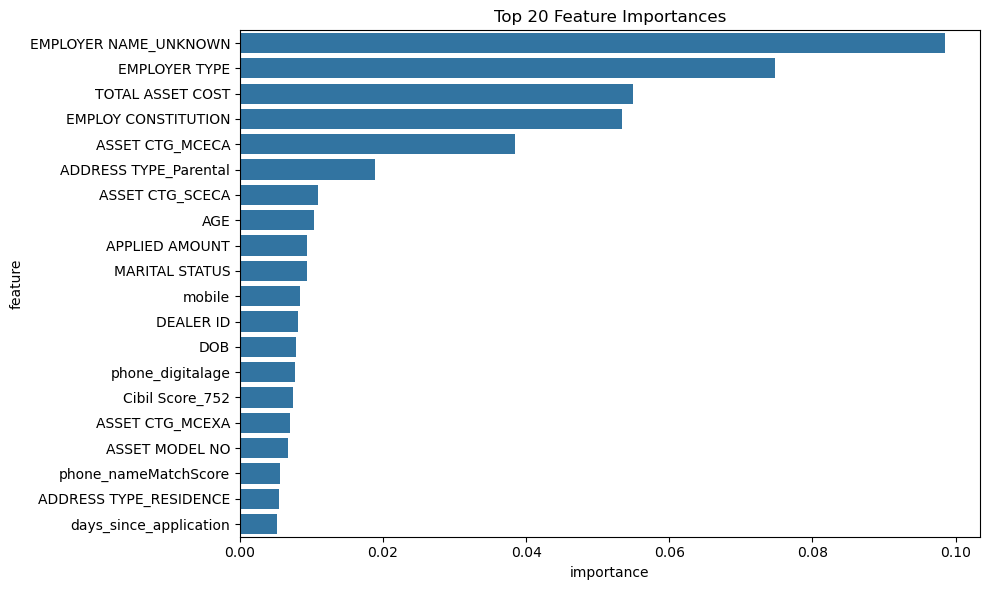

Model training, evaluation, and predictions completed successfully!


In [394]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(train_data, test_data):
    # Identify categorical columns from the training set
    categorical_columns = train_data.select_dtypes(include=['object']).columns
    print("Categorical columns:", categorical_columns)
    
    # Convert dates to numeric features if applicable
    date_columns = train_data.select_dtypes(include=['datetime']).columns
    if date_columns.size > 0:
        print("Date columns to be converted:", date_columns)
        for col in date_columns:
            train_data[col] = train_data[col].astype(np.int64) // 10**9  # Convert to Unix timestamp
            test_data[col] = test_data[col].astype(np.int64) // 10**9

    # Convert boolean columns to int if applicable
    bool_columns = train_data.select_dtypes(include=['bool']).columns
    if bool_columns.size > 0:
        print("Boolean columns to be converted:", bool_columns)
        for col in bool_columns:
            train_data[col] = train_data[col].astype(int)
            test_data[col] = test_data[col].astype(int)

    # One-hot encode categorical columns in both train and test datasets
    train_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
    test_encoded = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)
    
    # Align columns in test set to match train set
    test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)
    
    return train_encoded, test_encoded

# Preprocess train and test data
X_train, X_test = preprocess_data(train_data.drop('Application Status', axis=1), test_data.drop('UID', axis=1))
y_train = train_data['Application Status']

# Ensure X and X_test have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Split the training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Preprocessing and scaling completed successfully!")

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred = rf_model.predict(X_val_scaled)

# Evaluate the model
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

# Plot feature importances
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

# Prepare test data and make predictions
X_test_scaled = scaler.transform(X_test)
test_predictions = rf_model.predict(X_test_scaled)

# Create the submission file
submission = pd.DataFrame({'UID': test_data['UID'], 'Prediction': test_predictions})
submission.to_csv('predictions2.csv', index=False)

print("Model training, evaluation, and predictions completed successfully!")
